Test out a log version of the best-fit curve

In [1]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np
import pandas as pd
#import richardsplot as rplot
from astropy.table import Table

In [4]:
!ls ../data

HST_Chandra_Redshifts.csv
HST_SDSS_Data
Rankine20_CIV_HeII_wDelGI_wCIVDist_ugriz.fits
SDSS_Filters
data_filters.tgz
dr16qsocat_czrSF11.061821.dat
grdr7.8403col.Rankine20match_deredugriz.fits
test
vandenberk01_medianSDSSspectrum.txt


In [5]:
df = Table.read('../data/Rankine20_CIV_HeII_wDelGI_wCIVDist_ugriz.fits', format='fits')
names = [name for name in df.colnames if len(df[name].shape) <= 1]
dat = df[names].to_pandas()
dat.head()

,SDSS_NAME,RA,Dec,z_paul,good,nBAL,AIi,BIi,CIV_blue,CIV_EW,...,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,BI_CIV,MI,FIRST_FLUX,Delta_G_I,CIV_Distance
0,"b""b'00000-00000'""",37.878914,-5.979054,1.978870,True,False,True,False,-494.607254,51.555290,...,165,"b""b'BOSS'""",2.002,0.0,"b""b'VI'""",0.0000,-45.772591,-1.0,0.257,0.446845
1,"b""b'00000-00000'""",37.681328,-4.705002,1.658950,False,False,True,False,170.299612,18.484854,...,815,"b""b'BOSS'""",1.650,0.0,"b""b'VI'""",0.0000,-45.230927,-1.0,0.870,0.641868
2,"b""b'00000-00000'""",38.413724,-5.005835,1.650225,True,False,True,False,1458.723050,28.998439,...,31,"b""b'BOSS'""",1.645,0.0,"b""b'VI'""",0.0000,-45.223328,-1.0,-0.274,0.695980
3,"b""b'00000-00000'""",37.484777,-5.040745,1.682022,True,False,False,True,573.970534,30.974248,...,278,"b""b'BOSS'""",1.680,0.0,"b""b'VI'""",1817.0256,-45.276993,-1.0,0.322,0.595771
4,"b""b'00000-00000'""",36.424650,-5.592339,1.653923,True,False,False,True,992.493501,91.379252,...,445,"b""b'BOSS'""",1.660,0.0,"b""b'VI'""",0.0000,-45.246048,-1.0,0.413,0.323098


In [6]:
dat.shape

(145946, 23)

In [12]:
(dat["SPECTRO"].values==b"b'BOSS'").sum()

131607

Compare how CIV distance compares for DR7 and DR14 spectra.  There seems to be a bias towards high EWs in our VLA sample -- maybe due to e.g. the S/N cutoff??

In [13]:
z = dat[["z_paul"]].values.flatten()
blue = dat[["CIV_blue"]].values.flatten()
EW   = dat[["CIV_EW"]].values.flatten()
logEW= np.log10(EW)
CIVdist = dat["CIV_Distance"].values
EW_HeII = dat[["HeII_EW"]].values.flatten()
D_GI = dat[["Delta_G_I"]].values.flatten()
good = dat[["good"]].values.flatten()
MI   = dat[["MI"]].values.flatten()
d    = 3.08e19 #cm
L2500= -0.4 * ( MI + 48.60 + 2.5*np.log10(1.+2) ) + np.log10(4*np.pi*(d**2))
sdss = dat["SPECTRO"].values==b"b'SDSS'"
boss = dat["SPECTRO"].values==b"b'BOSS'"

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


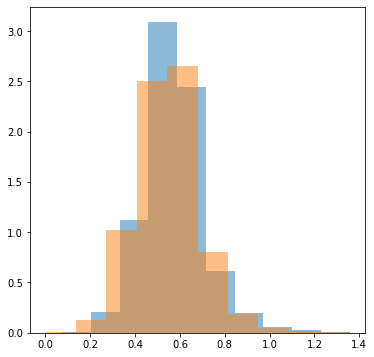

0.5744860440763391 0.5465460609066733


In [17]:
plt.figure(figsize=(6,6))
plt.hist(CIVdist[sdss&good], alpha=0.5, density=True)
plt.hist(CIVdist[boss&good], alpha=0.5, density=True)
plt.show()

print(np.mean(CIVdist[sdss&good]), np.mean(CIVdist[boss&good]))

Maybe the difference isn't so big between DRs -- so maybe we should consider why the LOFAR sample looks the way it does?

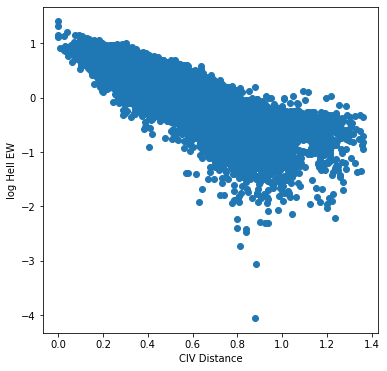

In [21]:
fig = plt.figure(figsize=(6,6))
plt.scatter(CIVdist[good&(EW_HeII>0)], np.log10(EW_HeII[good&(EW_HeII>0)]))
plt.xlabel("CIV Distance")
plt.ylabel("log HeII EW")
plt.show()

So there is no physical turnover in HeII EW.